<a href="https://colab.research.google.com/github/LLegler89/Portfolio/blob/main/Data_Mining_Life_Expectancy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source:

Title: Life Expectancy (WHO): Statistical Analysis on factors influencing Life Expectancy

URL: “https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data”

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

csv_file_path = '/content/Life Expectancy Data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Visualize the structure of the dataset
print(df)

# Dropping incomplete rows
df = df.dropna()


# Check for changes to the data structure
print(df)

# Generate new column that designates the countries status as 0 if developing and 1 if developed

df['developed'] = df['Status'].apply(lambda x: 0 if x == 'Developing' else 1)


# Generate age categories for life expectancy

decade_conditions = [
    (df['Life expectancy '] > 40) & (df['Life expectancy '] <= 45),
    (df['Life expectancy '] > 45) & (df['Life expectancy '] <= 50),
    (df['Life expectancy '] > 50) & (df['Life expectancy '] <= 55),
    (df['Life expectancy '] > 55) & (df['Life expectancy '] <= 60),
    (df['Life expectancy '] > 60) & (df['Life expectancy '] <= 65),
    (df['Life expectancy '] > 65) & (df['Life expectancy '] <= 70),
    (df['Life expectancy '] > 70) & (df['Life expectancy '] <= 75),
    (df['Life expectancy '] > 75) & (df['Life expectancy '] <= 80),
    (df['Life expectancy '] > 80) & (df['Life expectancy '] <= 85),
    (df['Life expectancy '] > 85) & (df['Life expectancy '] <= 90),
    # Add more conditions for other decades as needed
]

# Define the corresponding values for each decade range
decade_values = ['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)', '(86-90)']

# Add a new column 'Life_Expectancy_Decade' based on the conditions and values
df['Life_expectancy_range'] = np.select(decade_conditions, decade_values)

# Visualize dataframe again

print(df)

# Generate Summary Statistics

print("Summary Statistics:")
print(df.describe())

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [2]:
def print_unique_values(df, column_name):
  """
  Prints all the unique values found in a single column of the dataframe.

  Args:
      df (pd.DataFrame): The dataframe containing the data.
      column_name (str): The name of the column to analyze.
  """
  unique_values = df[column_name].unique()
  unique_values.sort()
  print(f"Unique values in '{column_name}':")
  for value in unique_values:
    print(f"\t- {value}")

# Validate ranges were generated correctly
print_unique_values(df, "Life_expectancy_range")

Unique values in 'Life_expectancy_range':
	- (41-45)
	- (46-50)
	- (51-55)
	- (56-60)
	- (61-65)
	- (66-70)
	- (71-75)
	- (76-80)
	- (81-85)
	- (86-90)


In [16]:

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the features (X) and target variable (y)
X = df.drop(['Country', 'Year', 'Status','Life_expectancy_range'], axis =1)
y = df['Life_expectancy_range']

# Convert y to a 1-dimensional array using values and ravel
y_array = np.ravel(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_std, y_train)
dt_predictions = dt_classifier.predict(X_test_std)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_std, y_train)
knn_predictions = knn_classifier.predict(X_test_std)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

print("")

# Use k folding Cross-validation for Decision Tree Classifier
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (dt_cv_scores.mean(), dt_cv_scores.std()))
print("")
# Use Cross-validation for kNN Classifier
knn_cv_scores = cross_val_score(knn_classifier, X, y, cv=5)
print(f"kNN Cross-Validation Scores: {knn_cv_scores}")
print("%0.2f accuracy with a standard deviation of %0.2f" % (knn_cv_scores.mean(), knn_cv_scores.std()))



Decision Tree Accuracy: 1.0
KNN Accuracy: 0.6868686868686869

Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00

kNN Cross-Validation Scores: [0.22424242 0.19393939 0.17272727 0.16969697 0.17021277]
0.19 accuracy with a standard deviation of 0.02


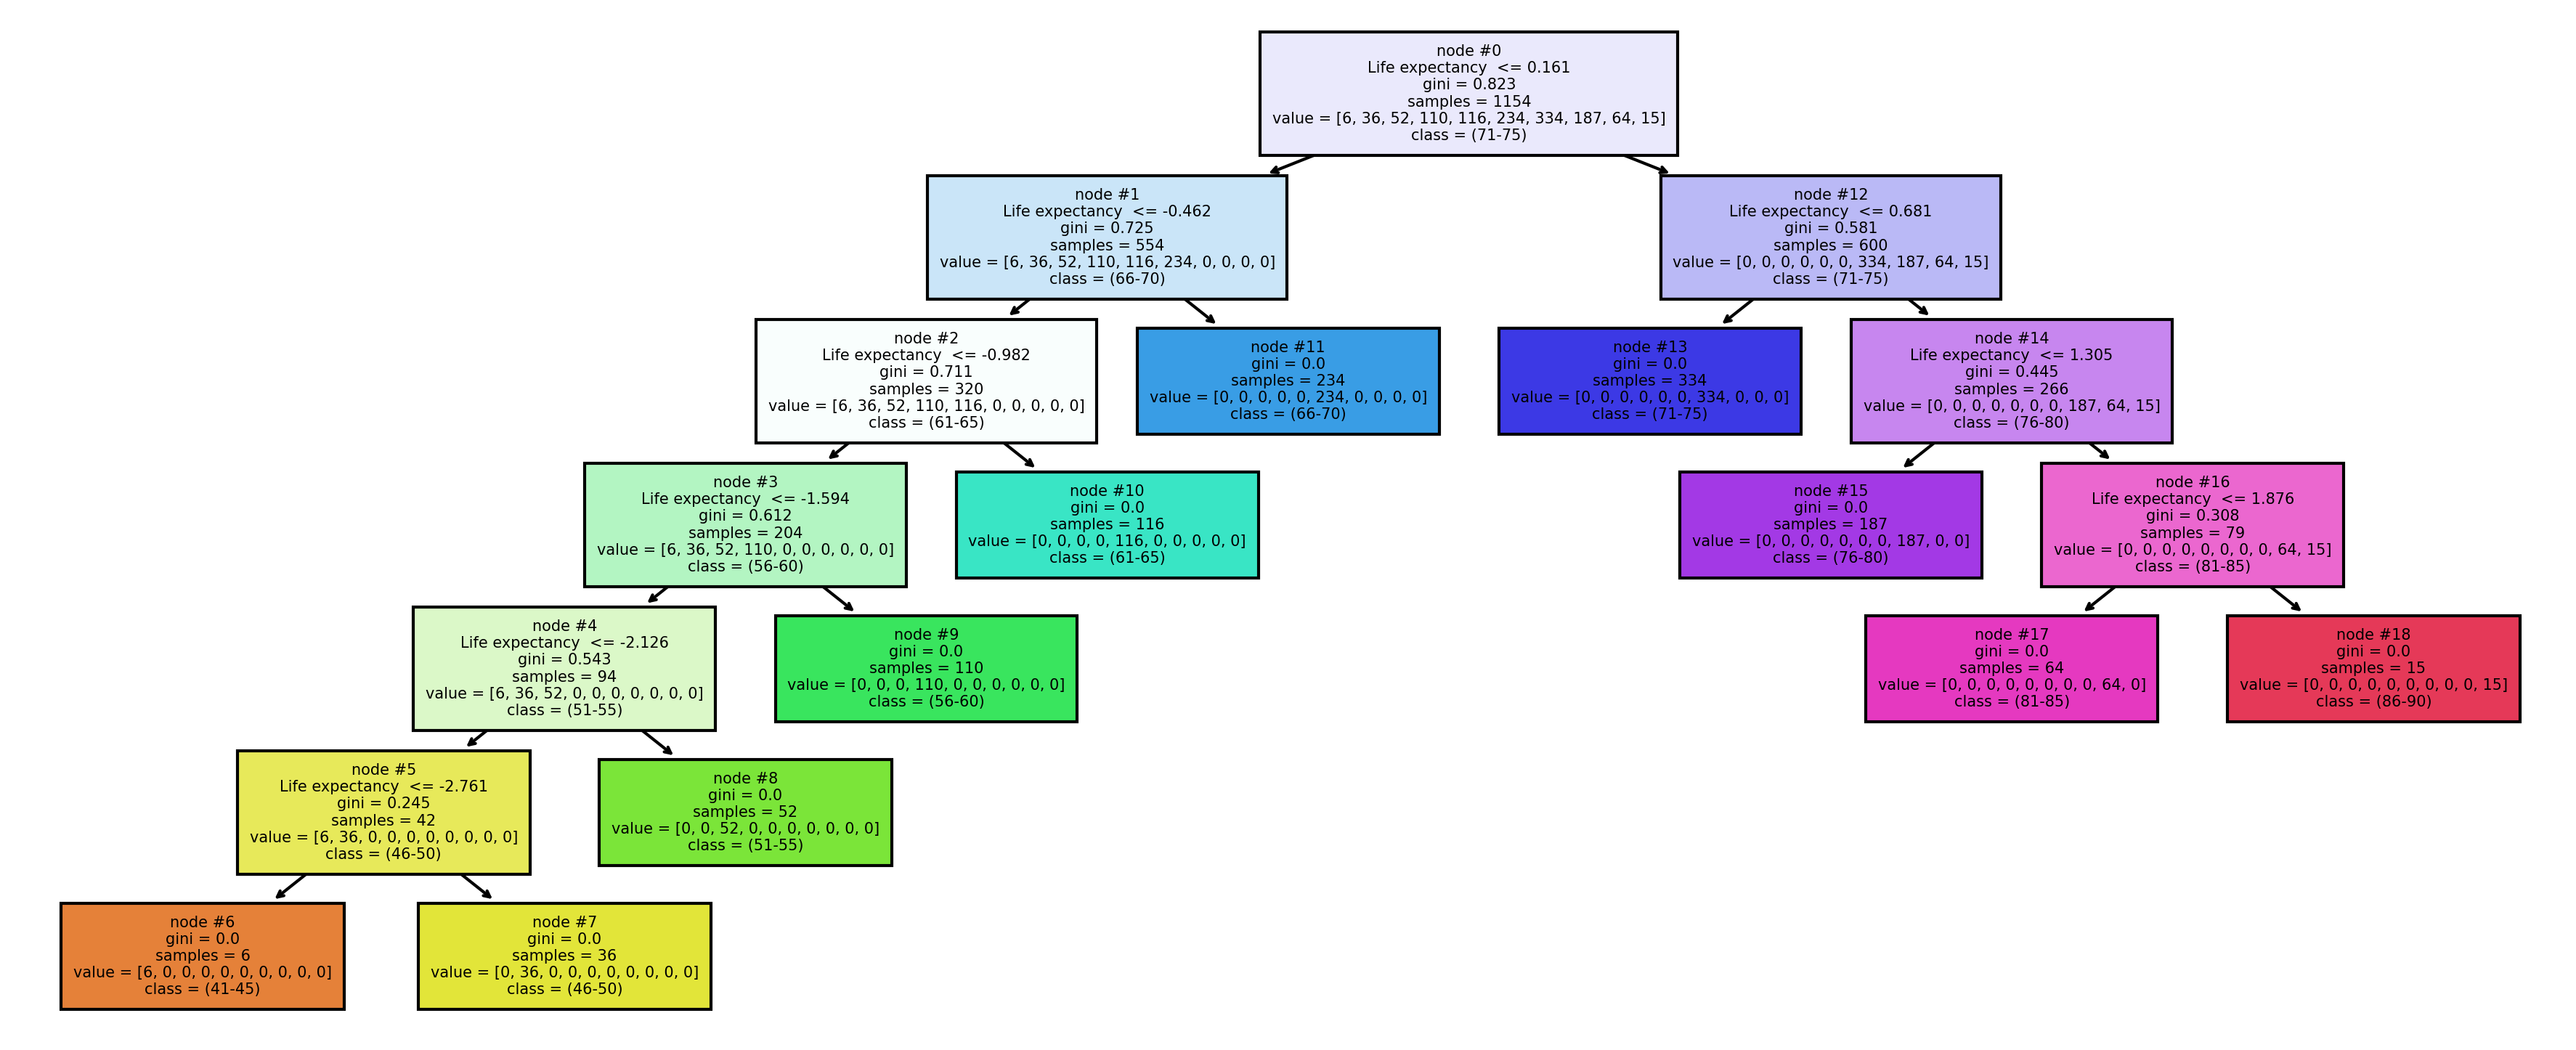

In [14]:
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 6), dpi=300)
plot_tree(dt_classifier,
           feature_names = X_train.columns,
           class_names = ['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)','(86-90)'],
           filled = True,
           node_ids = True,
           fontsize=5)
plt.show()



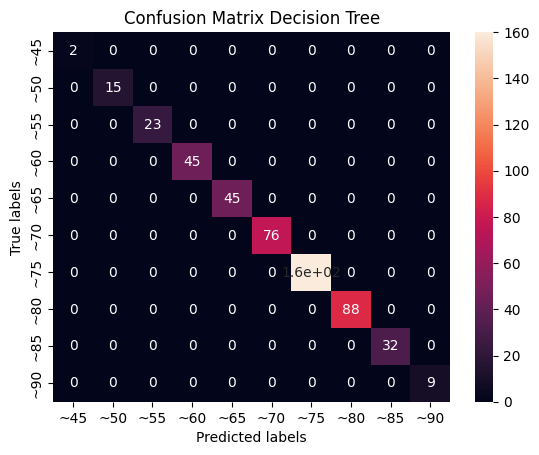

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = dt_classifier.predict(X_test_std)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up plot
ax = plt.subplot()

# Create heatmap
sns.heatmap(cm, annot=True, ax=ax)  # Annotate cells with values

# Set labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(['~45', '~50', '~55', '~60', '~65', '~70', '~75', '~80', '~85','~90'])  # Use column labels as x-axis tick labels
ax.set_yticklabels(['~45', '~50', '~55', '~60', '~65', '~70', '~75', '~80', '~85','~90'])  # Use column labels as y-axis tick labels

# Set title
ax.set_title('Confusion Matrix Decision Tree')

# Display the plot
plt.show()

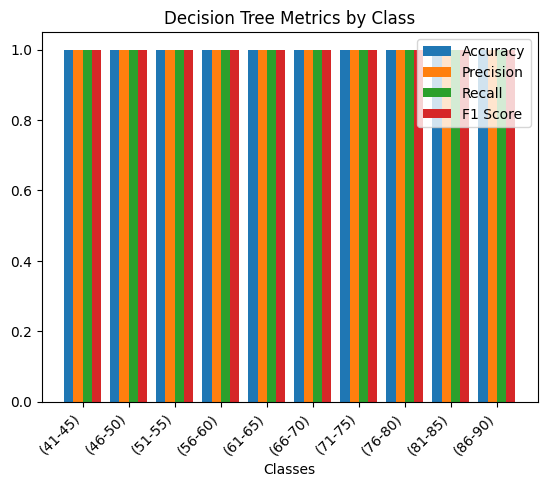

In [17]:
# Calculate metrics along the desired axis
labels=['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)','(86-90)']
metrics = precision_recall_fscore_support(dt_classifier.predict(X_test_std), y_test, average=None, labels=labels)

# Extract individual metrics
precision, recall, f1, _ = metrics

# Calculate accuracy separately

# Plot bar chart
classes = ['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)','(86-90)']
x = np.arange(len(classes))

fig, ax = plt.subplots()
bar_width = 0.2

# Plot accuracy
ax.bar(x - 1.5 * bar_width, [dt_accuracy] * len(classes), bar_width, label='Accuracy')

# Plot precision, recall, and F1 score
ax.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision')
ax.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall')
ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

plt.xlabel('Classes')
plt.title('Decision Tree Metrics by Class')
plt.show()

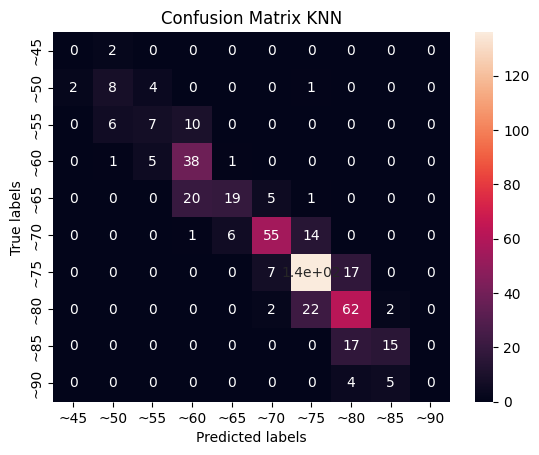

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = knn_classifier.predict(X_test_std)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up plot
ax = plt.subplot()

# Create heatmap
sns.heatmap(cm, annot=True, ax=ax)

# Set labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(['~45', '~50', '~55', '~60', '~65', '~70', '~75', '~80', '~85','~90'])  # Use column labels as x-axis tick labels
ax.set_yticklabels(['~45', '~50', '~55', '~60', '~65', '~70', '~75', '~80', '~85','~90'])  # Use column labels as y-axis tick labels

# Set title
ax.set_title('Confusion Matrix KNN')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


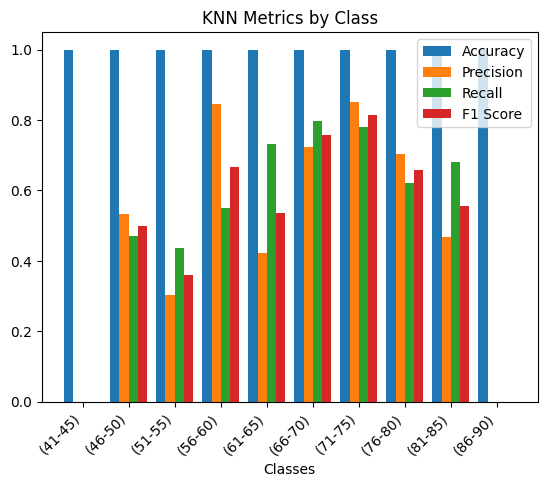

In [20]:
# Calculate metrics along the desired axis (axis=2 in this example)
labels=['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)','(86-90)']
metrics = precision_recall_fscore_support(knn_classifier.predict(X_test_std), y_test, average=None, labels=labels)

# Extract individual metrics
precision, recall, f1, _ = metrics

# Calculate accuracy separately

# Plot bar chart
classes = ['(41-45)', '(46-50)', '(51-55)', '(56-60)', '(61-65)', '(66-70)', '(71-75)', '(76-80)', '(81-85)','(86-90)']
x = np.arange(len(classes))

fig, ax = plt.subplots()
bar_width = 0.2

# Plot accuracy
ax.bar(x - 1.5 * bar_width, [dt_accuracy] * len(classes), bar_width, label='Accuracy')

# Plot precision, recall, and F1 score
ax.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision')
ax.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall')
ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')  # Rotate labels for better visibility
ax.legend()

plt.xlabel('Classes')
plt.title('KNN Metrics by Class')
plt.show()

# Through this analysis we find that the decision-tree classifier utilizing gini index for node determination is more appropriate for this dataset, when compared to a K-Nearest Neighbors classifier.

# Our decision tree model was able to achieve perfect recall, accuracy, precision, and F1 score. There is a potential for over fitting that may be artificially boosting these attributes. However, after  using k-folds cross validation, these metrics held constant. This may indicate that the model is robust beyond these data.

# The next steps to be taken would be to implement different clustering and classification methodologies to investigate the most efficient tactic for drawing useful and applicable insights from this data set.